In [ ]:
! pip install CMake

In [ ]:
!pip install dlib

In [ ]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
from PIL import Image
import os
#import time

# Get image from camera

<class 'cv2.VideoCapture'>
[(93, 300) (217, 424)] 1
[(373, 114) (552, 293)] 2


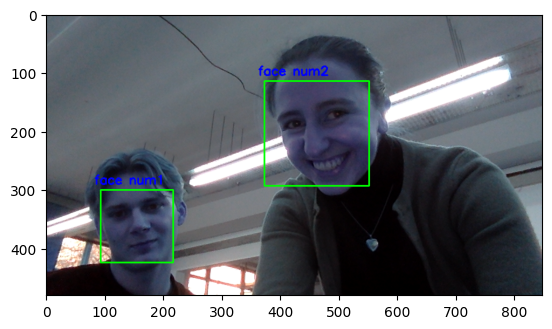

In [43]:
## Connects to your computer's default camera
#cap = cv2.VideoCapture(0)
#print(type(cap))
#
#
## Detect the coordinates
#detector = dlib.get_frontal_face_detector()
#
#
## Capture frames continuously
#while True:
#
#    # Capture frame-by-frame
#    ret, frame = cap.read()
#    frame = cv2.flip(frame, 1)
#    # RGB to grayscale
#    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#    faces = detector(gray)
#    # Iterator to count faces
#    i = 0
#    for face in faces:
#
#        # Get the coordinates of faces
#        x, y = face.left(), face.top()
#        x1, y1 = face.right(), face.bottom()
#        cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
#        # Increment iterator for each face in faces
#        i = i+1
#        # Display the box and faces
#        cv2.putText(frame, 'face num'+str(i), (x-10, y-10),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
#        print(face, i)
#
#    # Display the resulting frame
#    #print(type(frame))
#    plt.imshow(frame)
#    # This command let's us quit with the "q" button on a keyboard.
#    if cv2.waitKey(1):# & 0xFF == ord('q'):
#        #print('stop')
#        break
#
#
## Release the capture and destroy the windows
#cap.release()
#cv2.destroyAllWindows()
#

# Change to thumbnail input

Number of faces detected: 2
[(229, 45) (301, 117)] 1
[(21, 37) (93, 109)] 2
CPU times: user 616 ms, sys: 16.7 ms, total: 633 ms
Wall time: 706 ms


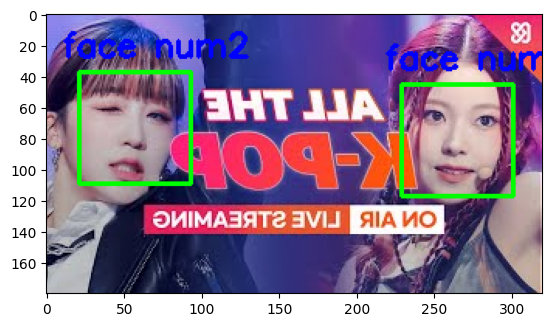

In [50]:
%%time
# Detect the coordinates
detector = dlib.get_frontal_face_detector()


# Capture thumbnail
img = Image.open('/Users/nicolafriedrich/code/jacksharples1/youtube_optimizer/bucket_data/thumbnail_images_0-RirLdUYEE_7032222')
frame = np.array(img)


frame = cv2.flip(frame, 1)
# RGB to grayscale
#gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(frame)
print("Number of faces detected: {}".format(len(faces)))
# Iterator to count faces
i = 0
for face in faces:
    # Get the coordinates of faces
    x, y = face.left(), face.top()
    x1, y1 = face.right(), face.bottom()
    cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
    # Increment iterator for each face in faces
    i = i+1
    # Display the box and faces
    cv2.putText(frame, 'face num'+str(i), (x-10, y-10),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    print(face, i)
# Display the resulting frame

#print(type(frame))
plt.imshow(frame)
# This command let's us quit with the "q" button on a keyboard.
cv2.waitKey(1)
# Rlease the capture and destroy the windows
cv2.destroyAllWindows()

# Loop

In [39]:
from google.cloud import storage

In [102]:
def load_data_direct(bucket_name):
    bucket = storage.Client().get_bucket(bucket_name)
    face_dicts = []
    for blob in bucket.list_blobs(prefix = 'long_data(lunch4)'): 
        filename = blob.name.strip('long_data(lunch4)/')
        if len(filename)>0:
            img = cv2.imdecode(
                        np.asarray(bytearray(blob.download_as_string()), dtype=np.uint8), -1)
            num_faces = len(detector(img))
            if num_faces != 0:
                last_underscore = filename.rfind('_')
                video_id = filename[0:last_underscore]
                view_count = filename[last_underscore+1:]
                face_dict = {'video_id':video_id,'view_count':view_count,'num_faces':num_faces}
                face_dicts.append(face_dict)
            else:
                continue
        else:
            continue
    return face_dicts

In [103]:
%%time
images = load_data_direct('nf_youtube')
images

CPU times: user 4min 38s, sys: 13.6 s, total: 4min 51s
Wall time: 38min 31s


[{'video_id': '--PJru8WQhw', 'view_count': '141612', 'num_faces': 1},
 {'video_id': '-0GbqToowCw', 'view_count': '5657317', 'num_faces': 2},
 {'video_id': '-6Kiyudi0oM', 'view_count': '1033505', 'num_faces': 2},
 {'video_id': '-7ekQ7rr4pU', 'view_count': '3767858', 'num_faces': 2},
 {'video_id': '-FKgblgN1JI', 'view_count': '599', 'num_faces': 1},
 {'video_id': '-Ht4SrD1KPA', 'view_count': '14329035', 'num_faces': 1},
 {'video_id': '-IbfjbhFocI', 'view_count': '653176', 'num_faces': 1},
 {'video_id': '-IhgbNaeMoU', 'view_count': '3348947', 'num_faces': 1},
 {'video_id': '-J8HskXNtaM', 'view_count': '953539', 'num_faces': 1},
 {'video_id': '-LIMVVfRp6Q', 'view_count': '33674759', 'num_faces': 1},
 {'video_id': '-M0jRaOOkT8', 'view_count': '324212', 'num_faces': 2},
 {'video_id': '-NVIBd1dkk8', 'view_count': '14800', 'num_faces': 1},
 {'video_id': '-Oh6ti7lh4g', 'view_count': '174713', 'num_faces': 2},
 {'video_id': '-QQVnKd4Bjo', 'view_count': '3267563', 'num_faces': 1},
 {'video_id': '

In [105]:
import pandas as pd

In [132]:
face_list = pd.DataFrame(images)
face_list.drop([1016], axis=0, inplace=True)
face_list.drop([1378], axis=0, inplace=True)
face_list['view_count'] = pd.to_numeric(face_list['view_count'])
#face_list['view_count'][1016]

ZyNFltf09C


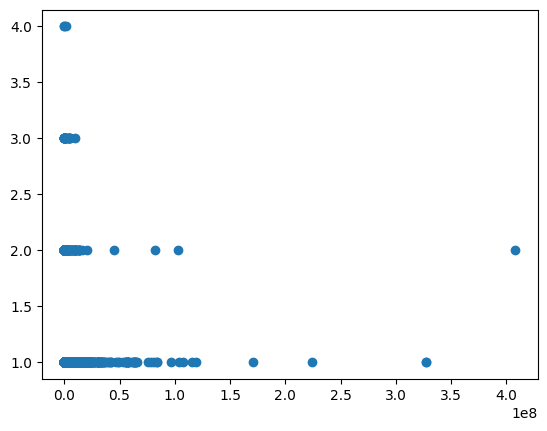

In [166]:
plt.scatter(face_list['view_count'],face_list['num_faces'])

In [168]:
import seaborn as sns

/Users/nicolafriedrich/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view_count', ylabel='num_faces'>

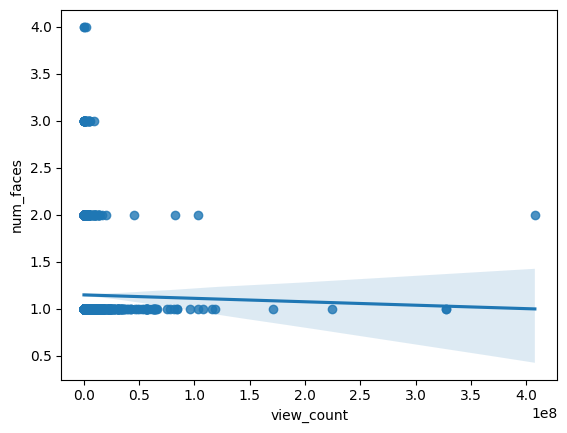

In [169]:
sns.regplot(face_list['view_count'],face_list['num_faces'])

<AxesSubplot:xlabel='view_count'>

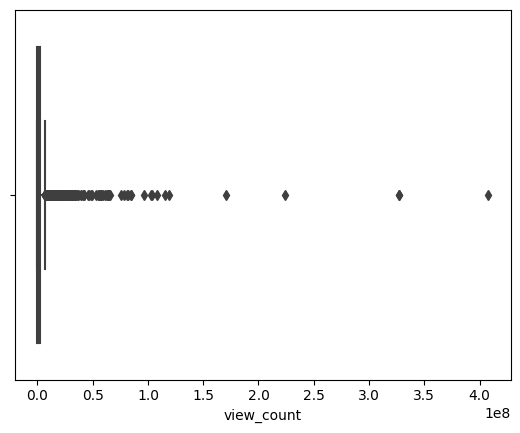

In [171]:
sns.boxplot(x = face_list['view_count'],hue = face_list['num_faces'])

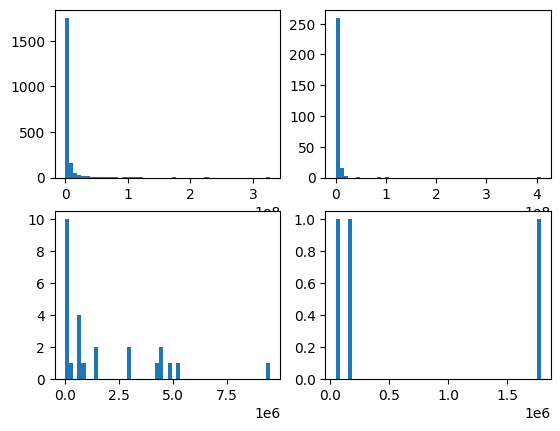

In [161]:
#plt.plot(face_list['view_count']for face_list['num_count'] == 1)
plt.subplot(2,2,1)
plt.hist(face_list.loc[face_list['num_faces'] == 1]['view_count'],bins=50);
plt.subplot(2,2,2)
plt.hist(face_list.loc[face_list['num_faces'] == 2]['view_count'],bins=50);
plt.subplot(2,2,3)
plt.hist(face_list.loc[face_list['num_faces'] == 3]['view_count'],bins=50);
plt.subplot(2,2,4)
plt.hist(face_list.loc[face_list['num_faces'] == 4]['view_count'],bins=50);

/Users/nicolafriedrich/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nicolafriedrich/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nicolafriedrich/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing oth

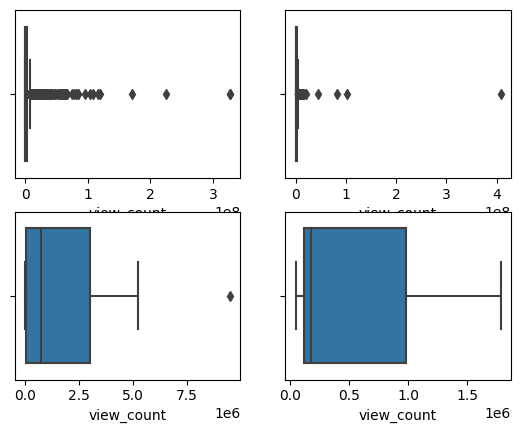

In [174]:
plt.subplot(2,2,1)
sns.boxplot(face_list.loc[face_list['num_faces'] == 1]['view_count']);
plt.subplot(2,2,2)
sns.boxplot(face_list.loc[face_list['num_faces'] == 2]['view_count']);
plt.subplot(2,2,3)
sns.boxplot(face_list.loc[face_list['num_faces'] == 3]['view_count']);
plt.subplot(2,2,4)
sns.boxplot(face_list.loc[face_list['num_faces'] == 4]['view_count']);

In [165]:
face_list['num_faces'].value_counts()

1    2062
2     282
3      26
4       3
Name: num_faces, dtype: int64

In [176]:
face_list.groupby(face_list['num_faces']).mean()/1000000

,view_count
num_faces,
1,4.412051
2,4.021722
3,1.773900
4,0.668316
